# Introduction to Generative Techniques
## Goals
###    - What are the core building blocks that enable generative technologies?
###    - What techniques are possible and what cool things can we do with this tech?

## 1. Technical Building Blocks: DALLE-2 and Stable Diffusion
###    - CLIP Review
###    - Diffusion Deep Dive
###    - Model overview - how do they work and how are they different?
## 2. Applications:
###    - Text2Image
###    - "In-painting" 
###    - Img2Img 
###    - Textual Inversion / Dreambooth 
## 3. Follow ups 
###    - StableDream 
###    - Twitter threads 

GANs have been around forever - what's different now?
- Training adversarial networks is non-trivial.  They require both a generator and a discriminator to converge together.
- Guided diffusion allows us to condition the generative process in a slower and more iterative way - resulting in higher fidelity outputs

High-quality sampling: Many applications, especially those directly interacting with users, require high generation quality. For example, in speech generation, poor speech quality is difficult to understand. Similarly, in image modeling, the desired outputs are visually indistinguishable from natural images.

Mode coverage and sample diversity: If the training data contains a complex or large amount of diversity, a good generative model should successfully capture such diversity without sacrificing generation quality.

Fast and computationally inexpensive sampling: Many interactive applications require fast generation, such as real-time image editing. 


![hvs](media/GANs_Diffusion_Autoencoders.png)

credit: https://developer.nvidia.com/blog/improving-diffusion-models-as-an-alternative-to-gans-part-1/

## Diffusion Overview

![hvs](media/Diffusion.gif)

blog: https://huggingface.co/blog/annotated-diffusion
colab: https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/annotated_diffusion.ipynb

Key components:

- Diffusion models are transformer based generative models.  They are based on a u-net architecture which uses attention between convolution blocks to condition the model on your desired vector embedding.
- They require many calls to the u-net architecture which is why they can be slow at sample generation
- The goal is to take in a noised image at a particular time step and return the predicted noise.  The predicted noise is a tensor that has the same size/resoultion as the input image
- A sinusoidal position embedding is used to encode the current step t.  This allolws the network to "know" at which particular time step (noise level) it is operating for every image in a batch
- Loss function: optimizing the negative log likelihood of the training data — which allows you to predict the noise at each time step

GLIDE: https://blog.paperspace.com/glide-image-generation/
 To condition on the text, the text is first encoded into a sequence of K tokens. These tokens are then fed into a transformer model. The transformer's output then has two uses. First, the final token embedding is used in place of the class embedding for the ADM model. Second, the last layer of the token embeddings - a sequence of feature vectors - is projected separately to the dimensions for every attention layer in the ADM model and concatenated to the attention context of each. In practice, this allows for the ADM model to use its learned understanding of the inputted words and their associated images to generate an image from novel combinations of similar text tokens in a unique and photorealistic manner. This text-encoding transformer uses 24 residual blocks of width 2048, and has roughly 1.2 billion parameters.  

## CLIP Review

![hvs](media/CLIP.gif)

Credit: http://adityaramesh.com/posts/dalle2/dalle2.html

The basic idea of the CLIP training is simple:

1. Generate the image and text encoding of each of the image-caption pairs.
2. Calculate the cosine similarity of each (image, text) embedding pair.
3. Iteratively minimize the cosine similarity between incorrect image-caption pairs, and maximize the cosine similarity between the correct image-caption pairs.

CLIP is powerful because it allows us to create a shared vector space between images & natural language whose dimensions represent features of both modalities.

Important notes about CLIP
- It is not incentivized to preserve information about the relative positions of objects, or about which attributes apply to which objects
- Thus CLIP dependent generations will have a hard time distinguishing an image of a red cube with a blue cube on top of it, and another with the attributes reversed.  CLIP is only incentivized to learn the features of an image that are sufficient to match it up with the correct caption (as opposed to any of the others in the list). Unless it receives a counterexample (i.e., a caption that mentions a blue cube on top of a red cube), CLIP will not learn to preserve information about the objects’ relative positions.

## DALLE-2 Review

![hvs](media/Dalle2.png)

credit: https://arxiv.org/pdf/2204.06125.pdf

A high-level overview of unCLIP. Above the dotted line, we depict the CLIP training process,
through which we learn a joint representation space for text and images. Below the dotted line, we depict our
text-to-image generation process: a CLIP text embedding is first fed to an autoregressive or diffusion prior
to produce an image embedding, and then this embedding is used to condition a diffusion decoder which
produces a final image. Note that the CLIP model is frozen during training of the prior and decoder.

The Text encoding step:

1. Our caption is transformed into a [CLIP text embedding](https://www.kdnuggets.com/2021/03/beginners-guide-clip-model.html) using a neural network trained on 400 million (image, text) pairs

The Prior step:

1. Reduces the dimensionality of our CLIP text embedding using [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis)
2. [A Transformer (encoder-decoder) with Attention](http://ashish%20vaswani%2C%20noam%20shazeer%2C%20niki%20parmar%2C%20jakob%20uszkoreit%2C%20llion%20jones%2C%20aidan%20n.%20gomez%2C%20lukasz%20kaiser%2C%20and%20illia%20polosukhin.%20attention%20is%20all%20you%20need.%20arxiv:1706.03762,%202017./) is used to generate an image embedding from the text embedding

The Decoder step:

1. [A diffusion model GAN](https://arxiv.org/pdf/2006.09011.pdf) ([generative adversarial network](https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/)) is used to transform the image embedding into an image
2. The image is then fed into two CNNs ([convolutional neural networks](https://en.wikipedia.org/wiki/Convolutional_neural_network)) that upscale the image from 64x64 to 256x256, then finally to 1024x1024

The big advance of DALLE-2 is the ability to generate semantically consistent images conditioned on a prior that approximates image encodings

## Stable Diffusion

![hvs](media/stable_diffusion.png)


![hvs](media/stable_diffusion_text_conditioning.png)

Credit: https://jalammar.github.io/illustrated-stable-diffusion/

Key Componets:
- Combine a VAE to downsample the pixel space to a latent vector space where the diffusion process can operate on smaller vectors
- The resnet blocks don’t directly look at the text. But the attention layers merge those text representations in the latents. And now the next ResNet blocks can utilize that incorporated text information in its processing.
- Think about it as painting pictures by reducing noise over a number of steps.  Each step is conditioned on the input which allows the model to continue refining the generated output
- Trained on laion aesthetics → subset based on laion 5b

## Comparison:


Inpainting is the best feature of DALL.E 2 which makes it stand apart from other image generators. 
Also, [DALL.E 2 produces much better images when it has more than 2 characters](https://twitter.com/fabianstelzer/status/1561019248209715200), as compared to Midjourney or Stable Diffusion.

As to which among them is the best, Midjourney’s artistic ability, DALL E2’s realistic images and Stable Diffusion’s unrestricted use make all of the AI models better in one way or another. In the end, it depends upon the users’ requirements.

In [2]:
! export REPLICATE_API_TOKEN=d9aac0d736a85073d8fe45a8d4a1c30e1ea4485e

['https://replicate.delivery/pbxt/2WtGSzp84JpQBlnKrEdH9GmaVF7AM5YCJL07Cd0aeffQpH3fA/out-0.png']
Response :200


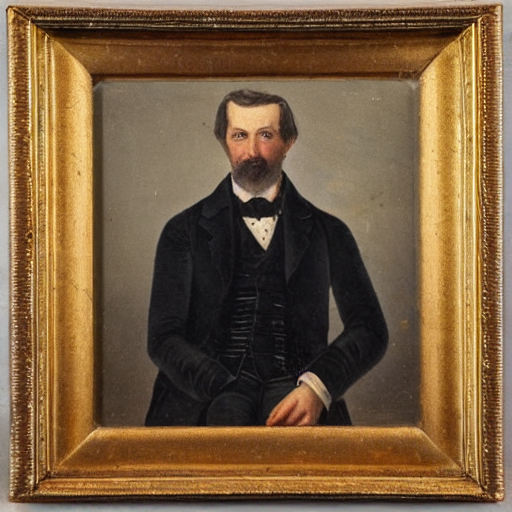

In [10]:
#Try it out:
import replicate
import os
import requests
from PIL import Image
import requests
from io import BytesIO

os.environ["REPLICATE_API_TOKEN"] = "d9aac0d736a85073d8fe45a8d4a1c30e1ea4485e"
model = replicate.models.get("stability-ai/stable-diffusion")
img = model.predict(prompt="a 19th century portrait of a gentleman") 
header = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0'}
response = requests.get(img[0], headers=header)
img = Image.open(BytesIO(response.content))
img


![hvs](media/image2image.png)
![hvs](media/inpainting.png)

Credit: https://openai.com/dall-e-2/